### I imported the necessary libraries

In [1]:
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from PIL import Image
from glob import glob
import cv2

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten , Conv2D,MaxPool2D
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/128x128/no_DR.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/train.csv
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/export.pkl
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/f481f76a6b75.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/abdb365cacbc.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/33ffddea8c6e.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/278aa860dffd.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images

In [3]:
def read_images(path,num_img):
    array=np.zeros((num_img,224,224,3))
    i=0
    for img in os.listdir(path):
        img_path=path + "/" + img
        img=Image.open(img_path,mode="r")
        data=np.asarray(img,dtype="uint8")
        array[i]=data
        i+=1
    return array
#no
no_dr_path=r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/No_DR"
num_no_dr=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/No_DR/*"))
no_dr_array=read_images(no_dr_path,num_no_dr)
no_dr_array=no_dr_array.astype(np.uint8)
#mild
mild_path=r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild"
num_mild=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/*"))
mild_array=read_images(mild_path,num_mild)
mild_array=mild_array.astype(np.uint8)
#moderate
moderate_path=r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Moderate"
num_moderate=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Moderate/*"))
moderate_array=read_images(moderate_path,num_moderate)
moderate_array=moderate_array.astype(np.uint8)
#proliferate
proliferate_dr_path=r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR"
num_proliferate_dr=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/*"))
proliferate_dr_array=read_images(proliferate_dr_path,num_proliferate_dr)
proliferate_dr_array=proliferate_dr_array.astype(np.uint8)
#severe
severe_path =r"/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Severe"
num_severe=len(glob("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Severe/*"))
severe_array=read_images(severe_path,num_severe)
severe_array=severe_array.astype(np.uint8)

In [11]:
import numpy as np
array=np.zeros((2,4,4,3))

In [13]:
array[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

### I converted from image to array but array's dtype must be uint8 for show the images.

### I showed the shape for learning images' shape

In [4]:
print("no_dr_array",no_dr_array.shape)
print("mild_array",mild_array.shape)
print("moderate_array",moderate_array.shape)
print("proliferate_dr_array",proliferate_dr_array.shape)
print("severe_array",severe_array.shape)

no_dr_array (1805, 224, 224, 3)
mild_array (370, 224, 224, 3)
moderate_array (999, 224, 224, 3)
proliferate_dr_array (295, 224, 224, 3)
severe_array (193, 224, 224, 3)


### I showed an image you

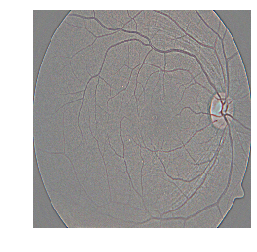

In [5]:
plt.imshow(no_dr_array[1])
plt.axis("off")
plt.show()

### I showed the dtypes of arrays for learning arrays' dtypes

In [6]:
print("no_dr_array dtype is",no_dr_array.dtype)
print("mild_array dtype is",mild_array.dtype)
print("moderate_array dtype is",moderate_array.dtype)
print("proliferate_dr_array dtype is",proliferate_dr_array.dtype)
print("severe_array dtype is",severe_array.dtype)

no_dr_array dtype is uint8
mild_array dtype is uint8
moderate_array dtype is uint8
proliferate_dr_array dtype is uint8
severe_array dtype is uint8


### I showed how many have images the different features

In [7]:
print("num_no_dr:",num_no_dr)
print("num_mild:",num_mild)
print("num_moderate:",num_moderate)
print("num_proliferate_dr:",num_proliferate_dr)
print("num_severe:",num_severe)

num_no_dr: 1805
num_mild: 370
num_moderate: 999
num_proliferate_dr: 295
num_severe: 193


### I determined different figures the labels for creating y variable according to keras

no_dr = 0

mild = 1

moderate = 2

proliferate_dr = 3

severe = 4

In [8]:
zeros=np.zeros(1805)
ones=np.ones(370)
twos=np.full(999,2)
threes=np.full(295,3)
fours=np.full(193,4)
y = np.concatenate((zeros,ones,twos,threes,fours),axis=0)
print("y shape",y.shape)

y shape (3662,)


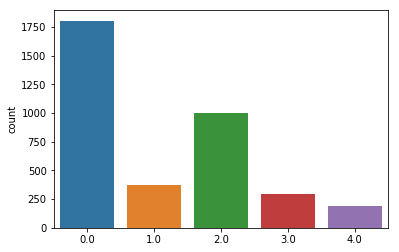

In [9]:
sns.countplot(y)
plt.show()

### I resized arrays (64,64,3) because RAM inadequate from me. If you increase size of arrays, the machine learn better but it works slowly

In [10]:
def resize_images(img,dim1=128,dim2=128, dim3=3):
    number_of_image=img.shape[0]
    new_array=np.zeros((number_of_image,dim1,dim2,dim3))
    for i in range(number_of_image):
        new_array[i]=cv2.resize(img[i,:,:,:],(dim1,dim2))
    return new_array
no_dr_array=resize_images(no_dr_array)
no_dr_array=no_dr_array.astype(np.uint8)
mild_array=resize_images(mild_array)
mild_array=mild_array.astype(np.uint8)
moderate_array=resize_images(moderate_array)
moderate_array=moderate_array.astype(np.uint8)
proliferate_dr_array=resize_images(proliferate_dr_array)
proliferate_dr_array=proliferate_dr_array.astype(np.uint8)
severe_array=resize_images(severe_array)
severe_array=severe_array.astype(np.uint8)

### I showed the arrays (64,64,3)

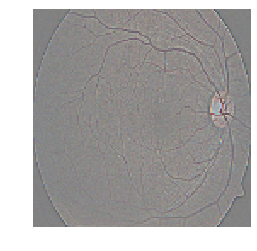

In [11]:
plt.imshow(no_dr_array[1])
plt.axis("off")
plt.show()

### I observed the new shape of arrays

In [12]:
print("new no_dr_array shape",no_dr_array.shape)
print("new mild_array shape",mild_array.shape)
print("new moderate_array shape",moderate_array.shape)
print("new proliferate_dr_array shape",proliferate_dr_array.shape)
print("new severe_array shape",severe_array.shape)

new no_dr_array shape (1805, 128, 128, 3)
new mild_array shape (370, 128, 128, 3)
new moderate_array shape (999, 128, 128, 3)
new proliferate_dr_array shape (295, 128, 128, 3)
new severe_array shape (193, 128, 128, 3)


### I showed the dtypes of arrays for learning arrays' dtypes

In [13]:
print("no_dr_array dtype is",no_dr_array.dtype)
print("mild_array dtype is",mild_array.dtype)
print("moderate_array dtype is",moderate_array.dtype)
print("proliferate_dr_array dtype is",proliferate_dr_array.dtype)
print("severe_array dtype is",severe_array.dtype)

no_dr_array dtype is uint8
mild_array dtype is uint8
moderate_array dtype is uint8
proliferate_dr_array dtype is uint8
severe_array dtype is uint8


### I categorized the labels for working my model

In [14]:
y = to_categorical(y,5)
print("new y shape",y.shape)

new y shape (3662, 5)


### I combined the arrays for creating training set and test set

In [15]:
x=np.concatenate((no_dr_array,mild_array,moderate_array,proliferate_dr_array,severe_array),axis=0)
print("x shape",x.shape)
print("x dtype is ",x.dtype)

x shape (3662, 128, 128, 3)
x dtype is  uint8


### I normalized the arrays for faster machine operation

In [16]:
x=x / 255.0

### I splitted it into two as training set and test set.

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2563, 128, 128, 3)
x_test shape (1099, 128, 128, 3)
y_train shape (2563, 5)
y_test shape (1099, 5)


In [18]:
x_train[0].shape

(128, 128, 3)

### I created my model
* if you increase conv2d number or filters number, your machine learn better
* if you incerase Dense number or units number, your machine learn better (units=Dense's parameter. Such as 250,125

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same",input_shape=x_train[0].shape))
model.add(MaxPool2D(pool_size=(2,2),strides=1))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2),strides=1))


model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 127, 127, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 508032)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32514112  
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

### I compiled my model

In [20]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

### I added new images. For example, I wrote horizontal_flip=True. This parameter take an image and it is rotated horizontally and new images are created.

In [21]:
datagen=ImageDataGenerator(
                          shear_range=0.3,
                          horizontal_flip=True,
                          vertical_flip=True,
                          zoom_range=0.3,
                          rotation_range=0.3)
datagen.fit(x_train)

In [22]:
batch_size=125
epochs=30
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True
)

### I started to work my model

In [24]:
hist=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                        epochs=epochs,callbacks=[early_stopping_monitor], validation_data=(x_test,y_test),steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/30
20/20 [==============================] - 10s 492ms/step - loss: 9.0078 - accuracy: 0.4299 - val_loss: 1.1232 - val_accuracy: 0.6642
Epoch 2/30
20/20 [==============================] - 8s 401ms/step - loss: 1.5050 - accuracy: 0.5176 - val_loss: 0.9758 - val_accuracy: 0.6433
Epoch 3/30
20/20 [==============================] - 8s 390ms/step - loss: 1.2048 - accuracy: 0.5517 - val_loss: 0.9486 - val_accuracy: 0.6633
Epoch 4/30
20/20 [==============================] - 9s 428ms/step - loss: 1.5597 - accuracy: 0.5652 - val_loss: 0.9922 - val_accuracy: 0.6315
Epoch 5/30
20/20 [==============================] - 8s 416ms/step - loss: 1.1347 - accuracy: 0.5734 - val_loss: 1.0773 - val_accuracy: 0.6624
Epoch 6/30
20/20 [==============================] - 8s 404ms/step - loss: 1.2883 - accuracy: 0.5980 - val_loss: 1.0019 - val_accuracy: 0.6624
Epoch 7/30
20/20 [==============================] - 8s 395ms/step - loss: 1.0470 - accuracy: 0.6239 - val_loss: 0.9583 - val_accuracy: 0.6843
Epoch

In [25]:
model.save('my_model.h5')


In [26]:
import scipy.misc
from skimage import data
import matplotlib.pyplot as plt

In [27]:
img_names = ['mild.png', 'moderate.png', 'no_dr.png', ]

(128, 128, 3)

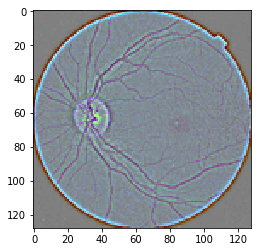

In [28]:
phdata = cv2.imread(r'../input/128x128/no_DR.png')
plt.imshow(phdata)
phdata.shape

In [29]:
model.predict_classes(phdata.reshape(1,128,128,3))

array([0])

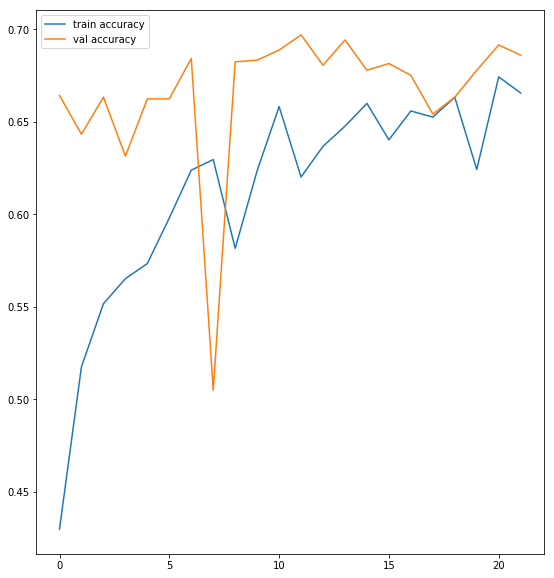

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.plot(hist.history["accuracy"],label="train accuracy")
plt.plot(hist.history["val_accuracy"],label="val accuracy")
plt.legend()
plt.show()